In [1]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
import numpy as np

**Hyper Parameter**

In [2]:
EPOCH = 10
BATCH_SIZE = 64
LR = 0.005
N_TEST_IMG = 5

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

**Download MNIST Dataset**

In [4]:
train_data = torchvision.datasets.MNIST(root='./mnist.', train=True, transform=torchvision.transforms.ToTensor(),download=True)

In [5]:
train_loader=Data.DataLoader(dataset=train_data,batch_size=BATCH_SIZE,shuffle=True)

In [6]:
print(train_data.train_data.size())

torch.Size([60000, 28, 28])


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


In [7]:
print(train_data.train_labels.size())

torch.Size([60000])


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


Text(0.5, 1.0, '4')

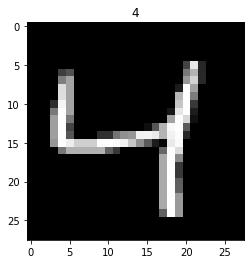

In [8]:
plt.imshow(train_data.train_data[2].numpy(),cmap='gray')
plt.title('%i'%train_data.train_labels[2])

**AutoEncoder Module**

In [9]:
class AutoEncoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder = nn.Sequential(
        nn.Linear(in_features=28*28, out_features=128),
        nn.Tanh(),
        nn.Linear(in_features=128,out_features=64),
        nn.Tanh(),
        nn.Linear(in_features=64, out_features=12),
        nn.Tanh(),
        nn.Linear(in_features=12,out_features=3),
    )

    self.decoder = nn.Sequential(
        nn.Linear(in_features=3, out_features=12),
        nn.Tanh(),
        nn.Linear(in_features=12,out_features=64),
        nn.Tanh(),
        nn.Linear(in_features=64, out_features=128),
        nn.Tanh(),
        nn.Linear(in_features=128,out_features=28*28),
        nn.Sigmoid()
    )

  def forward(self, x):
      encoded = self.encoder(x)
      decoded = self.decoder(encoded)
      return encoded, decoded

In [10]:
autoEncoder = AutoEncoder().to(device)

**Loss and Optimizer**

In [11]:
optimizer = torch.optim.Adam(autoEncoder.parameters(),lr=LR)
loss_func = nn.MSELoss()

**Plotting**

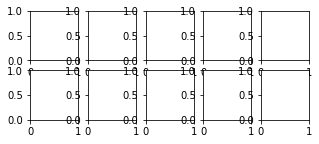

In [12]:
# initialize figure
f, a = plt.subplots(2, N_TEST_IMG, figsize=(5, 2))
plt.ion()   # continuously plot

In [13]:
# original data (first row) for viewing
view_data = train_data.train_data[:N_TEST_IMG].view(-1, 28*28).type(torch.FloatTensor)/255.
for i in range(N_TEST_IMG):
    a[0][i].imshow(np.reshape(view_data.data.numpy()[i], (28, 28)), cmap='gray'); a[0][i].set_xticks(()); a[0][i].set_yticks(())

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


**Training Loop**

In [14]:
for epoch in range(EPOCH):
  for step, (x,y) in enumerate(train_loader):
    b_x = x.view(-1,28*28).to(device)
    b_y = x.view(-1,28*28).to(device)
    b_label = y.to(device)

    encoded, decoded = autoEncoder(b_x)

    loss = loss_func(decoded, b_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 100 == 0:
      print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.cpu().numpy())

      # plotting decoded image (second row)
      _, decoded_data = autoEncoder(view_data.to(device))
      for i in range(N_TEST_IMG):
          a[1][i].clear()
          a[1][i].imshow(np.reshape(decoded_data.data.cpu().numpy()[i], (28, 28)), cmap='gray')
          a[1][i].set_xticks(()); a[1][i].set_yticks(())
      plt.draw()
      plt.pause(0.05)
      plt.show()

Epoch:  0 | train loss: 0.2312


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0683


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0644


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0618


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0614


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0557


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0502


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0488


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0457


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0454


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0445


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0486


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0474


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0431


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0422


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0464


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0451


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0433


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0453


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0427


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0422


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0418


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0419


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0449


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0436


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0437


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0391


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0445


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0396


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0415


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0417


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0399


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0400


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0413


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0406


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0418


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0400


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0404


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0405


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0420


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0405


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0364


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0327


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0411


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0372


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0375


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0338


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0390


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0357


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0381


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0377


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0364


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0390


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0341


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0364


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0366


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0378


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0399


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0353


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0360


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0351


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0358


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0390


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0361


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0351


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0360


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0362


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0397


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0379


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0364


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0371


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0358


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0342


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0406


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0354


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0347


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0383


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0332


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0386


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0394


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0368


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0362


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0365


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0373


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0378


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0358


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0393


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0329


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0332


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0370


<Figure size 432x288 with 0 Axes>

Epoch:  9 | train loss: 0.0348


<Figure size 432x288 with 0 Axes>

Epoch:  9 | train loss: 0.0343


<Figure size 432x288 with 0 Axes>

Epoch:  9 | train loss: 0.0370


<Figure size 432x288 with 0 Axes>

Epoch:  9 | train loss: 0.0343


<Figure size 432x288 with 0 Axes>

Epoch:  9 | train loss: 0.0327


<Figure size 432x288 with 0 Axes>

Epoch:  9 | train loss: 0.0343


<Figure size 432x288 with 0 Axes>

Epoch:  9 | train loss: 0.0349


<Figure size 432x288 with 0 Axes>

Epoch:  9 | train loss: 0.0364


<Figure size 432x288 with 0 Axes>

Epoch:  9 | train loss: 0.0342


<Figure size 432x288 with 0 Axes>

Epoch:  9 | train loss: 0.0388


<Figure size 432x288 with 0 Axes>